#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip freeze > requirements.txt

In [3]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [4]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [5]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [6]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [7]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# Main Focus:  How do different economical events happening around the world impact the frequency of the car donation?

In [8]:
!pip install yfinance

In [9]:
!pip install plotly

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime

In [11]:
dc_colors=["#2B3A64", "#96aae3", "#C3681D", "#EFBD95", "#E73F74", "#80BA5A", "#E68310", "#008695", "#CF1C90", "#f97b72", "#4b4b8f", "#A5AA99"]

In [12]:
pio.templates["dc"]=go.layout.Template(
    layout=dict(
       font={"family": "Poppins, Sans-serif", "color": "#505050"},
        title={"font": {"family": "Poppins, Sans-serif", "color": "black"}, "yanchor": "top", "y": 0.92, "xanchor": "left", "x": 0.025},
    	plot_bgcolor="white",
    	paper_bgcolor="white",
    	hoverlabel=dict(bgcolor="white"),
    	margin=dict(l=100, r=50, t=75, b=70),
        colorway=dc_colors,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True,
                   gridwidth=0.1,
                   gridcolor='lightgrey',
                   showline=True,
                   nticks=10,
                   linewidth=1,
                   linecolor='black',
                   rangemode="tozero")
    )
    )


# Get the stock data

In [13]:
import yfinance as yahooFinance

GetSP500=yahooFinance.download('SPY', start='2020-02-01', end='2023-3-01')

print(GetSP500.info)

[*********************100%%**********************]  1 of 1 completed
<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-03  323.350006  326.160004  323.220001  324.119995  305.588135   
2020-02-04  328.070007  330.010010  327.720001  329.059998  310.245697   
2020-02-05  332.269989  333.089996  330.670013  332.859985  313.828400   
2020-02-06  333.910004  334.190002  332.799988  333.980011  314.884369   
2020-02-07  332.820007  333.989990  331.600006  332.200012  313.206177   
...                ...         ...         ...         ...         ...   
2023-02-22  399.519989  401.130005  397.019989  398.540009  394.165070   
2023-02-23  401.559998  402.200012  396.250000  400.660004  396.261810   
2023-02-24  395.420013  397.250000  393.640015  396.380005  392.028778   
2023-02-27  399.869995  401.290009  396.750000  397.730011  393.363953   
2023-02-28 

# Combine car donation with the finance dataset

In [14]:
car_donation.columns

Index(['operation', 'id', 'status', 'Sold_Year', 'Sold_month',
       'Sold_Yearmonth', 'Donation_date', 'time', 'name', 'car_year', 'make',
       'model', 'mileage', 'plate', 'vin', 'phone', 'address', 'addr', 'email',
       'infofrom', 'remarks', 'whopickup', 'cleanorsalvage',
       'carfaxinfoowners', 'registrationfee', 'cost', 'workhours', 'whorepair',
       'fixrecord', 'onlinedate', 'firstprice', 'dateofsale', 'price',
       'Direct cost', 'cost type', 'Cost subtype', 'buyer', 'addrofbuyer',
       'whosale', 'who1098', 'leavemessage', 'todolist', 'whotodo',
       'salemileage', 'postdateofbill', 'donorinfo', 'complain', 'ticketNo',
       'ticketdeadline', 'ticketSender', 'ticketAddress', 'stockworklog',
       'areacode', 'isreferral', 'referrer', 'referralfee', 'buyerphone',
       'buyerID', 'buyerEmail', 'plateNew', 'inventoryDate', 'categoryColor',
       'mechanicalIssues', 'retailWholesaleJunk', 'newPlateFromDealer',
       'vinAudit', 'kbb', 'dmvMarketValue', 'useT

In [15]:
# First, need to convert Sold_Yearmonth column to datetime type
import pandas as pd

# We are converting the 'Sold_Yearmonth' column to datetime type
car_donation['Sold_Yearmonth'] = pd.to_datetime(car_donation['Sold_Yearmonth'])
# Filter the DataFrame using the desired months
#filtered_car_donation_df = car_donation[car_donation['Sold_Yearmonth'].dt.strftime('%Y-%m-%d')isin(['2020-12-31','2021-12-31'])]
filtered_car_donation_df = car_donation[
      (car_donation['Sold_Yearmonth']>= pd.to_datetime('2020-01-01'))&
      (car_donation['Sold_Yearmonth']<= pd.to_datetime('2021-12-31'))
]

In [16]:
filtered_car_donation_df
filtered_car_donation_df['Sold_Yearmonth'] = pd.to_datetime(filtered_car_donation_df['Sold_Yearmonth'])

<ipython-input-16-2348afd640d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_car_donation_df['Sold_Yearmonth'] = pd.to_datetime(filtered_car_donation_df['Sold_Yearmonth'])


In [17]:
GetSP500=GetSP500.reset_index()

In [18]:
GetSP500['Date'] = pd.to_datetime(GetSP500['Date'])
#GetSP500['Sold_Yearmonth']= GetSP500['Date'].dt.to_period('M')
GetSP500['Sold_Yearmonth']= GetSP500['Date'].dt.strftime("%Y-%m-%d")
GetSP500['Sold_Yearmonth'] = pd.to_datetime(GetSP500['Sold_Yearmonth'])

In [19]:
GetSP500

,Date,Open,High,Low,Close,Adj Close,Volume,Sold_Yearmonth
0,2020-02-03,323.350006,326.160004,323.220001,324.119995,305.588135,69083000,2020-02-03
1,2020-02-04,328.070007,330.010010,327.720001,329.059998,310.245697,62573200,2020-02-04
2,2020-02-05,332.269989,333.089996,330.670013,332.859985,313.828400,65951100,2020-02-05
3,2020-02-06,333.910004,334.190002,332.799988,333.980011,314.884369,50359700,2020-02-06
4,2020-02-07,332.820007,333.989990,331.600006,332.200012,313.206177,64139400,2020-02-07
...,...,...,...,...,...,...,...,...
769,2023-02-22,399.519989,401.130005,397.019989,398.540009,394.165070,83742300,2023-02-22
770,2023-02-23,401.559998,402.200012,396.250000,400.660004,396.261810,96242400,2023-02-23
771,2023-02-24,395.420013,397.250000,393.640015,396.380005,392.028778,108194400,2023-02-24
772,2023-02-27,399.869995,401.290009,396.750000,397.730011,393.363953,80444700,2023-02-27


In [20]:
combined_df1 = pd.merge(GetSP500, filtered_car_donation_df, on='Sold_Yearmonth', how='inner')

In [21]:
combined_df1

,Date,Open,High,Low,Close,Adj Close,Volume,Sold_Yearmonth,operation,id,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,2020-09-01,350.209991,352.709991,349.239990,352.600006,335.866150,54908700,2020-09-01,SF,438.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,2020-10-01,337.690002,338.739990,335.010010,337.040009,322.329712,88698700,2020-10-01,SF,428.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,2020-10-01,337.690002,338.739990,335.010010,337.040009,322.329712,88698700,2020-10-01,SF,621.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,2020-12-01,365.570007,367.679993,364.929993,366.019989,350.044891,74231400,2020-12-01,SF,7.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,2020-12-01,365.570007,367.679993,364.929993,366.019989,350.044891,74231400,2020-12-01,SF,38.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,2021-12-01,461.640015,464.670013,450.290009,450.500000,436.906769,131939200,2021-12-01,LA,49.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
547,2021-12-01,461.640015,464.670013,450.290009,450.500000,436.906769,131939200,2021-12-01,ETC,464.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
548,2021-12-01,461.640015,464.670013,450.290009,450.500000,436.906769,131939200,2021-12-01,ETC,470.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
549,2021-12-01,461.640015,464.670013,450.290009,450.500000,436.906769,131939200,2021-12-01,ETC,479.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


# checking car's donated price trend with the stock price

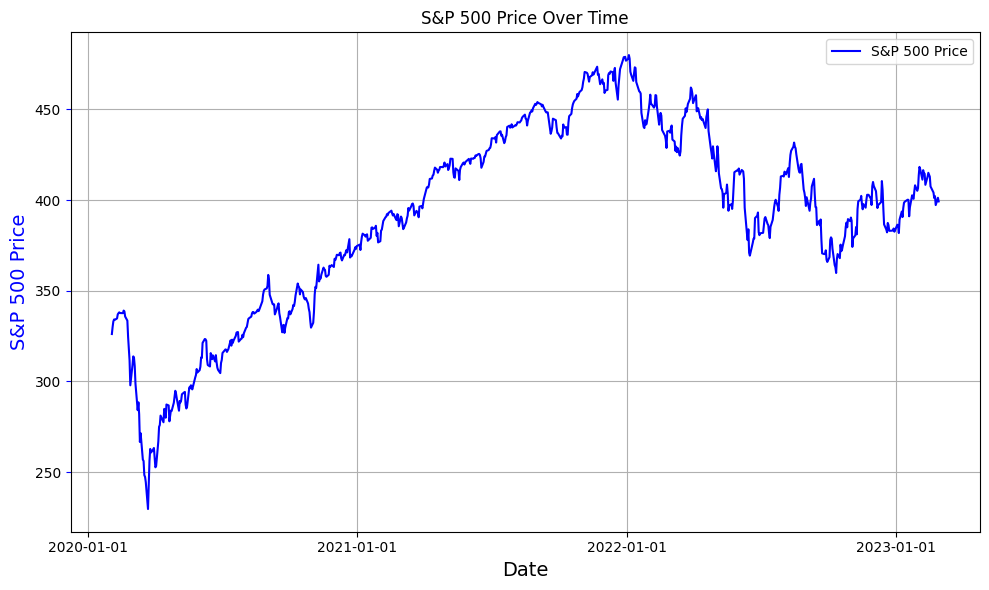

In [22]:
# We are importing the require library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates

# We are liminating the time series into specific range
date_range = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
# We are Converting the 'DATE' column to datetime
GetSP500['Date'] = pd.to_datetime(GetSP500['Date'])

# We are Filter data within the specified date range
start_date = '2020-01-01'
end_date = '2021-12-31'
SP500_filtered = GetSP500[(GetSP500['Date'] >= start_date) & (GetSP500['Date'] <= end_date)]

# We are Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# We are Plotting SP500 Price on the primary y-axis
ax.plot(GetSP500['Date'],GetSP500['High'], linestyle='-', color='b', label='S&P 500 Price')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('S&P 500 Price', color='b', fontsize=14)
ax.tick_params('y', color='b')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.grid(True)

# we are Formatting plots
plt.title('S&P 500 Price Over Time')

# We are showing the legend
plt.legend()

# We are Tighter the layout for better spacing
plt.tight_layout()
plt.show()

# We are combine with car donation dataset

NameError: ignored

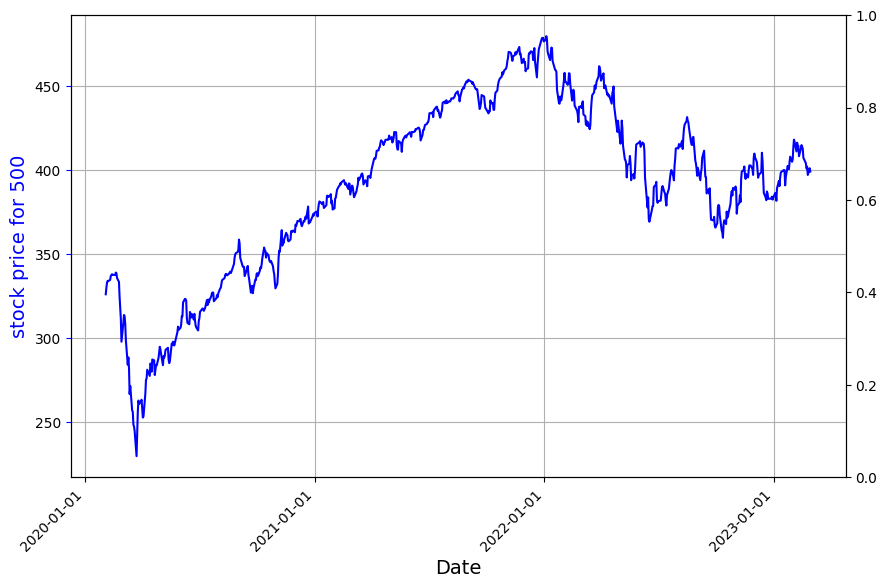

In [23]:
# import the require library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are importing the require library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates

# We are liminating the time series into specific range
date_range = pd.date_range(start='2021-01-01', end='2022-01-01', freq='D')
# We are Converting the 'DATE' column to datetime
GetSP500['Date'] = pd.to_datetime(GetSP500['Date'])

# We are Filter data within the specified date range
start_date = '2021-01-01'
end_date = '2022-01-01'
SP500_filtered = GetSP500[(GetSP500['Date'] >= start_date) & (GetSP500['Date'] <= end_date)]

# We are Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(GetSP500['Date'], GetSP500['High'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('stock price for 500', color='b', fontsize=14)
ax1.tick_params('y', color='b')


# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# We are Create a secondary y-axis (right) for car donation price
# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Formatting plots
plt.title('stock price for 500 Median Donated Car Price Over Time')

# We are showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()


# focus on only that segment

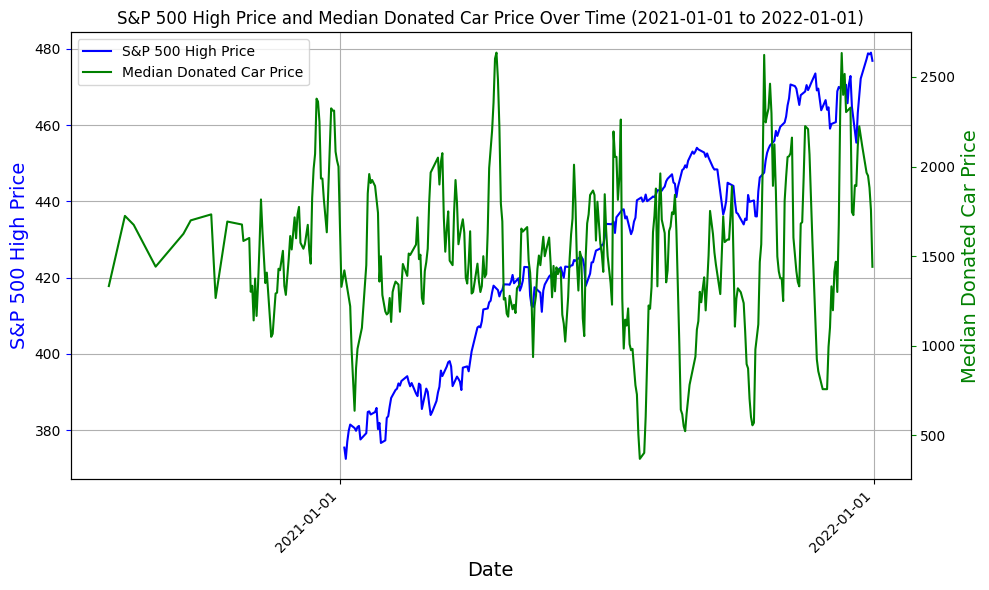

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have a DataFrame with SP500 data, replace this with your actual data
# SP500_filtered = ... # Your filtered DataFrame

# Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting stock price for S&P 500 on the primary y-axis (left)
ax1.plot(SP500_filtered['Date'], SP500_filtered['High'], linestyle='-', color='b', label='S&P 500 High Price')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('S&P 500 High Price', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# Customizing date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# Creating a secondary y-axis (right) for Median Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Formatting plots
plt.title('S&P 500 High Price and Median Donated Car Price Over Time (2021-01-01 to 2022-01-01)')

# Showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tightening the layout for better spacing
plt.tight_layout()
plt.show()


# We wish to add an rolling average

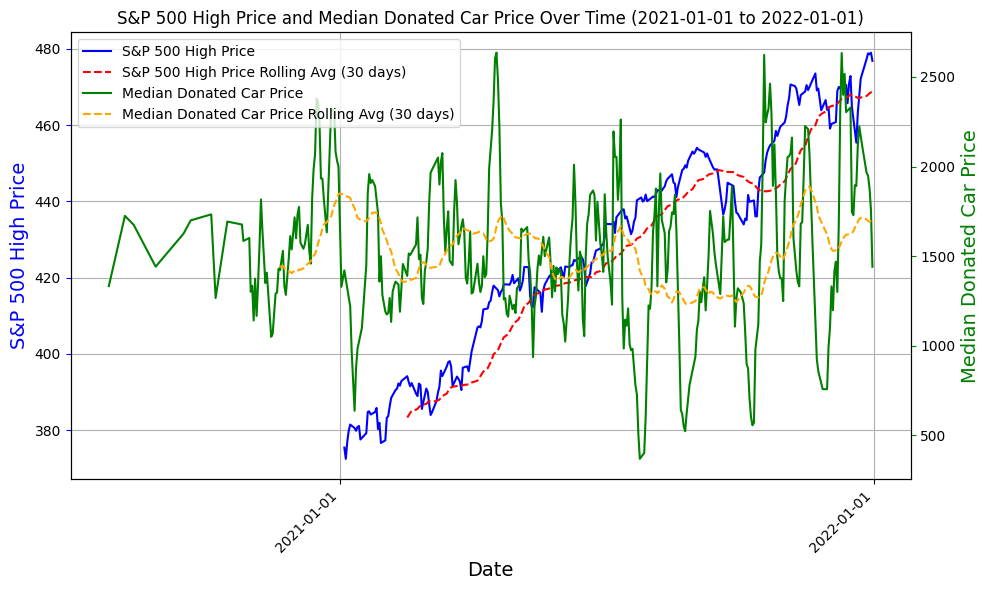

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have a DataFrame with SP500 data, replace this with your actual data
# SP500_filtered = ... # Your filtered DataFrame

# Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting stock price for S&P 500 on the primary y-axis (left)
ax1.plot(SP500_filtered['Date'], SP500_filtered['High'], linestyle='-', color='b', label='S&P 500 High Price')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('S&P 500 High Price', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# Customizing date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# Creating a secondary y-axis (right) for Median Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Adding rolling average for S&P 500 high prices
rolling_avg_window_sp500 = 30
rolling_avg_sp500 = SP500_filtered['High'].rolling(window=rolling_avg_window_sp500).mean()
ax1.plot(SP500_filtered['Date'], rolling_avg_sp500, linestyle='--', color='r', label=f'S&P 500 High Price Rolling Avg ({rolling_avg_window_sp500} days)')

# We are Adding rolling average for Median Donated Car price
rolling_avg_window_car_price = 30
rolling_avg_car_price = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window_car_price).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg_car_price, linestyle='--', color='orange', label=f'Median Donated Car Price Rolling Avg ({rolling_avg_window_car_price} days)')

# We are Formatting plots
plt.title('S&P 500 High Price and Median Donated Car Price Over Time (2021-01-01 to 2022-01-01)')
# Showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tightening the layout for better spacing
plt.tight_layout()
plt.show()

# We wish to observe the newly combined dataset of car donation and federal interest rate

In [26]:
# We also wish to get the federal discount rate
federal_discount=pd.read_csv("/content/drive/MyDrive/datas/INTDSRUSM193N.csv")

In [27]:
federal_discount.head()

,DATE,INTDSRUSM193N
0,1950-01-01,1.5
1,1950-02-01,1.5
2,1950-03-01,1.5
3,1950-04-01,1.5
4,1950-05-01,1.5


In [28]:
# Convert datetime columns to datetime type
federal_discount['DATE'] = pd.to_datetime(federal_discount['DATE'])
car_donation['Sold_Yearmonth'] = pd.to_datetime(car_donation['Sold_Yearmonth'])

# Merge the datasets using merge()
combined_FEDDIS_Car_donation_df = pd.merge(federal_discount,car_donation, left_on='DATE',right_on='Sold_Yearmonth', how='inner')
combined_FEDDIS_Car_donation_df.head()

,DATE,INTDSRUSM193N,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,2018-01-01,2.00,SF,674.0,11.0,2018.0,1.0,2018-01-01,2017/07/20,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,2019-01-01,3.00,SF,405.0,11.0,2019.0,1.0,2019-01-01,2019/01/12,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,2019-02-01,3.00,SF,406.0,11.0,2019.0,2.0,2019-02-01,2019/01/26,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,2019-03-01,3.00,SF,407.0,11.0,2019.0,3.0,2019-03-01,2019/02/21,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,2019-10-01,2.25,SF,518.0,12.0,2019.0,10.0,2019-10-01,2019/10/23,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


# Before we combine the time plot for both car donation and federal discount, we wish to check the time plot separately for both price and federal discount

# First, we wish to check the federal discount

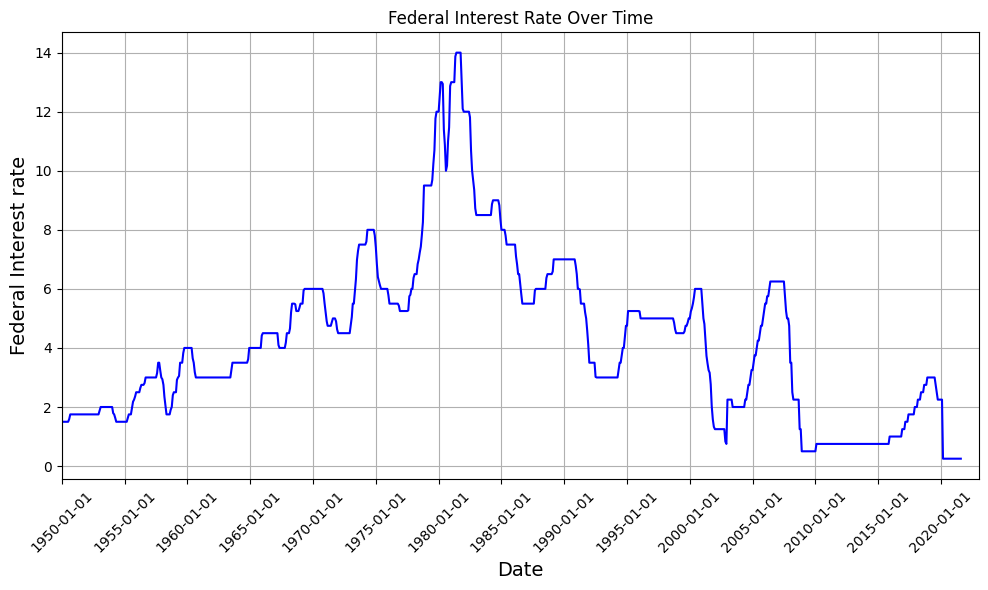

In [29]:
# Import the require library
import matplotlib.dates as mdates
# We are Plotting
plt.figure(figsize=(10, 6))
plt.plot(federal_discount['DATE'],federal_discount['INTDSRUSM193N'], linestyle='-', color='b')

# Time to Formating the plot
plt.title('Federal Interest Rate Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Federal Interest rate', fontsize=14)
# Setting up the xticks and xlimits
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('1950-01-01'), pd.to_datetime('2023-01-01'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()


# Next time to check the time plot for our pirce for car donation

In [30]:
car_donation.columns

Index(['operation', 'id', 'status', 'Sold_Year', 'Sold_month',
       'Sold_Yearmonth', 'Donation_date', 'time', 'name', 'car_year', 'make',
       'model', 'mileage', 'plate', 'vin', 'phone', 'address', 'addr', 'email',
       'infofrom', 'remarks', 'whopickup', 'cleanorsalvage',
       'carfaxinfoowners', 'registrationfee', 'cost', 'workhours', 'whorepair',
       'fixrecord', 'onlinedate', 'firstprice', 'dateofsale', 'price',
       'Direct cost', 'cost type', 'Cost subtype', 'buyer', 'addrofbuyer',
       'whosale', 'who1098', 'leavemessage', 'todolist', 'whotodo',
       'salemileage', 'postdateofbill', 'donorinfo', 'complain', 'ticketNo',
       'ticketdeadline', 'ticketSender', 'ticketAddress', 'stockworklog',
       'areacode', 'isreferral', 'referrer', 'referralfee', 'buyerphone',
       'buyerID', 'buyerEmail', 'plateNew', 'inventoryDate', 'categoryColor',
       'mechanicalIssues', 'retailWholesaleJunk', 'newPlateFromDealer',
       'vinAudit', 'kbb', 'dmvMarketValue', 'useT

In [41]:
car_donation['Donation_date_time'].min()

Timestamp('2017-07-20 00:00:00')

In [42]:
car_donation['Donation_date_time'].max()

Timestamp('2022-09-27 00:00:00')

# The time plot come out messy, I need to do some modification

In [43]:
car_donation['price'].max()

39000.0

# The time plot still look quite messy

# Question

<ipython-input-34-121299cf6dbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_donation['Donation_date_time'] = pd.to_datetime(car_donation['Donation_date'], errors='coerce')


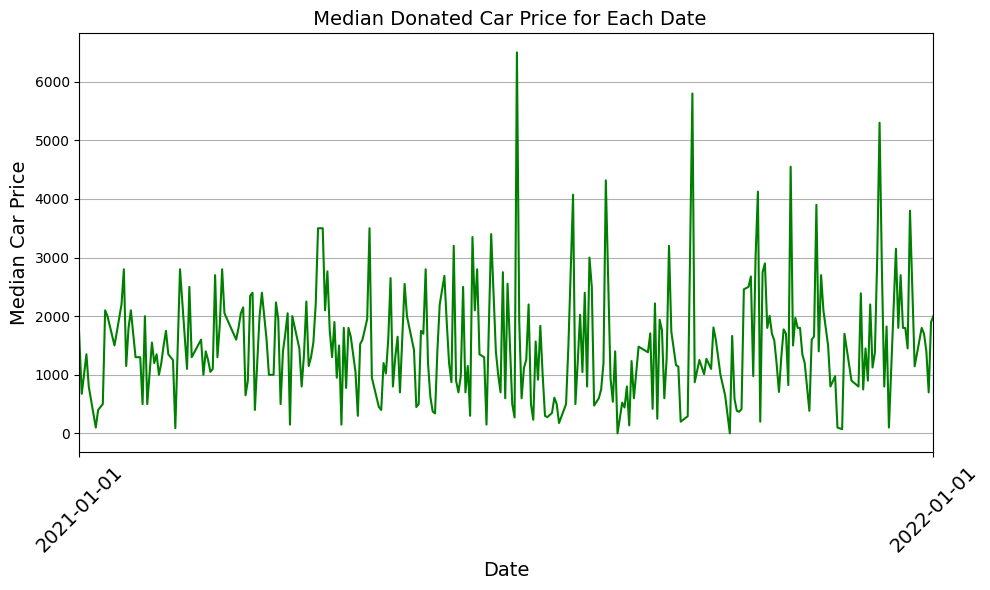

In [34]:
# Import the require library
import matplotlib.dates as mdates
# We are Plotting

# We first need to Covert Donation_date to datetime
car_donation['Donation_date_time'] = pd.to_datetime(car_donation['Donation_date'], errors='coerce')

car_donation = car_donation.dropna(subset=['Donation_date'])

# Filter out rows with 'price' less than 39000.0
filtered_data = car_donation[car_donation['price']< 39000.0]
# We need to Find the median price for each date
median_prices = filtered_data.groupby('Donation_date_time')['price'].median().reset_index()
#max_prices = filtered_data.loc[filtered_data.groupby('Donation_date')['price'].idxmax()]

# Filter out rows with NaN values in 'Donation_date_time' or 'price'
median_prices = median_prices.dropna(subset=['Donation_date_time', 'price'])

# Apply a 6 month moving average to further smooth thr data
median_prices['price_smoothed'] = median_prices['price'].rolling(window=6).mean()
# We need to Filter out rows with NaN values in 'Donation_date_time' or 'price'
#max_prices = max_prices.dropna(subset=['Donation_date_time', 'price'])
plt.figure(figsize=(10, 6))

# Focus on the time range from '2021-01-01' to '2022-01-01'
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-01-01')
# We are only Focus on the time range from '2021-01-01' to '2022-01-01'
plt.plot(median_prices['Donation_date_time'],median_prices['price'],linestyle='-', color='g')

# Time to Formating the plot
plt.title(' Median Donated Car Price for Each Date', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Median Car Price', fontsize=14)
# Setting up the xticks and xlimits
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='M'), fontsize=14, rotation=45)
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

# Next, we are ready to combine them

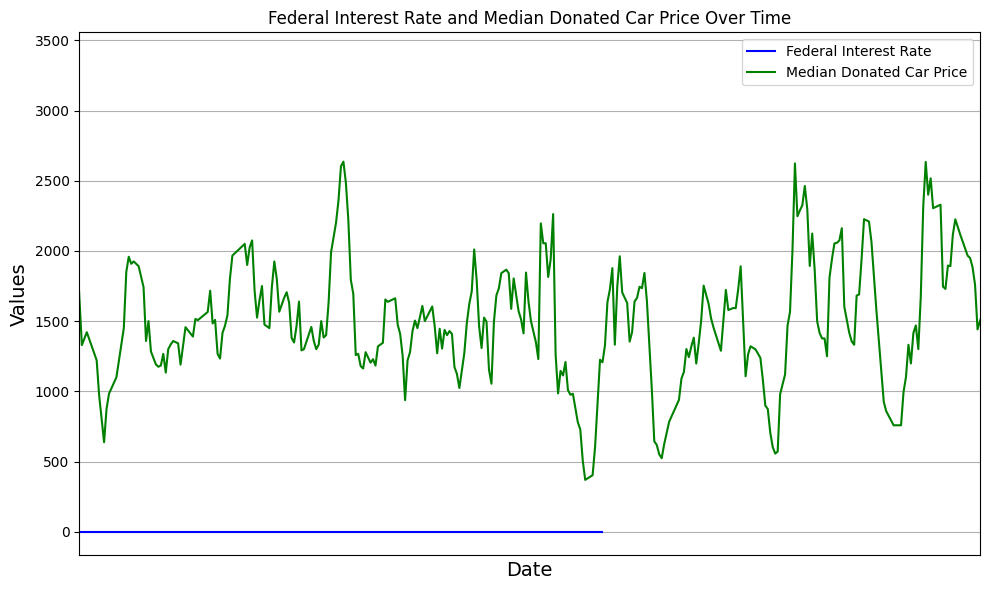

In [35]:
# Importing the require libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Ready to create a figure and axis
plt.figure(figsize=(10, 6))

# We are Plotting the Federal Interest Rate
plt.plot(federal_discount['DATE'], federal_discount['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')

# We are Plot Maximum Donated Car Price
plt.plot(median_prices['Donation_date_time'], median_prices['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')

# We are Formatting
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Values', fontsize=14)

# We are Setting up the xticks and xlimits
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='M'), fontsize=14, rotation=45)
plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2022-01-01'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.grid(True)
plt.legend()

# We are Having an Tight layout for better spacing
plt.tight_layout()
plt.show()

# Need to further improve it by including secondary y-axis for one of the datasets

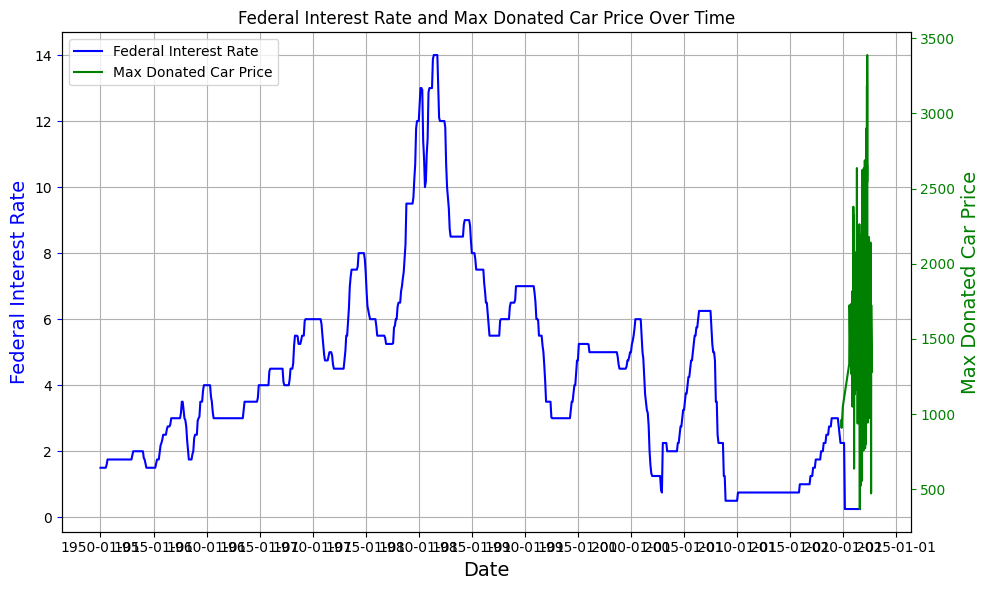

In [36]:
# Import the require library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# We are Plotting the Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount['DATE'], federal_discount['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.grid(True)

# We are ready to create a secondary y-axis (right) for Maximum Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices['Donation_date_time'], median_prices['price_smoothed'], linestyle='-', color='g', label='Max Donated Car Price')
ax2.set_ylabel('Max Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', colors='g')

# We are setting the x-axis limits and ticks for the specified time range

# We need to Formatting our plots
plt.title('Federal Interest Rate and Max Donated Car Price Over Time')

# We are Showing the legend for both lines
lines, labels =ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# we are Tighting the layout for better spacing
plt.tight_layout()
plt.show()

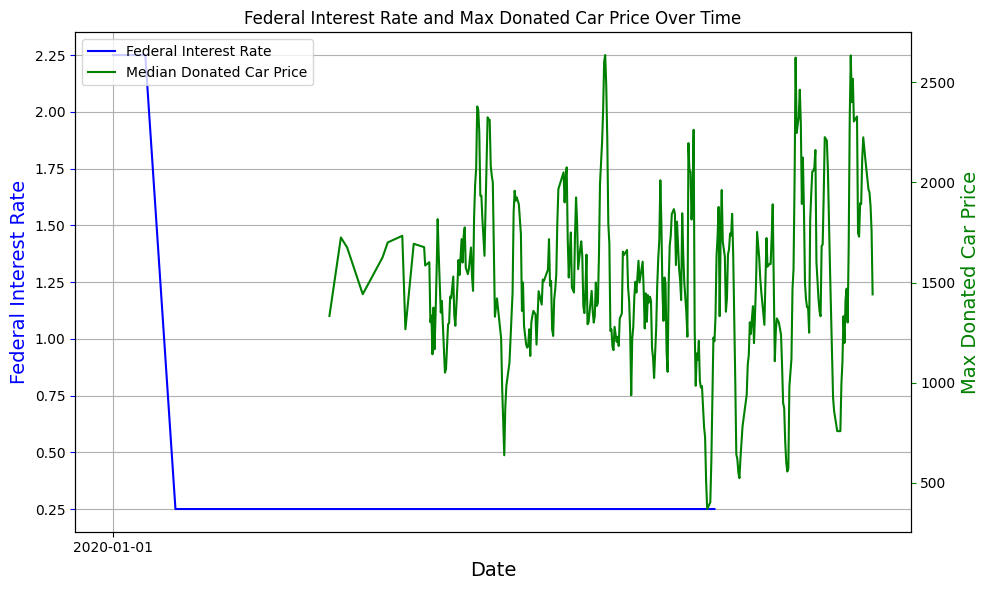

In [37]:
# Import the require library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

federal_discount['DATE'] = pd.to_datetime(federal_discount['DATE'])
median_prices['Donation_date_time'] = pd.to_datetime(median_prices['Donation_date_time'])

# we are Filter data within the specified date range
start_date = '2020-01-01'
end_date = '2021-12-31'
federal_discount_filtered = federal_discount[(federal_discount['DATE'] >= start_date) & (federal_discount['DATE']<= end_date)]
median_prices_filtered = median_prices[(median_prices['Donation_date_time'] >= start_date) & (median_prices['Donation_date_time']<= end_date)]

# create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.grid(True)

# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered['Donation_date_time'], median_prices_filtered['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Max Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Formatting plots
plt.title('Federal Interest Rate and Max Donated Car Price Over Time')

# We are showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()


# the plot looks a little bit messy, we wish to rerank them

<ipython-input-38-177f4fe44c7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_prices_filtered['Donation_date_time'] = pd.to_datetime(median_prices_filtered['Donation_date_time'])


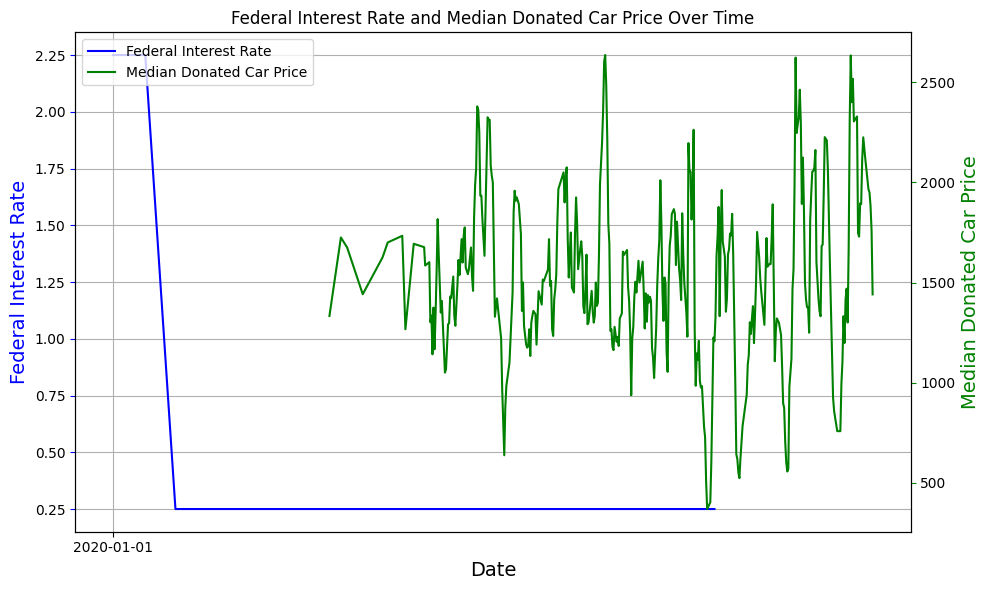

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Donation_date_time' is the datetime column in your max_prices_filtered dataframe
median_prices_filtered['Donation_date_time'] = pd.to_datetime(median_prices_filtered['Donation_date_time'])

# Sort the dataframe by the 'Donation_date_time' column
median_prices_filtered_sorted = median_prices_filtered.sort_values(by='Donation_date_time')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.grid(True)

# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Format plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()


# We need to customize the date label

<ipython-input-39-76fcf403d139>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_prices_filtered['Donation_date_time'] = pd.to_datetime(median_prices_filtered['Donation_date_time'])


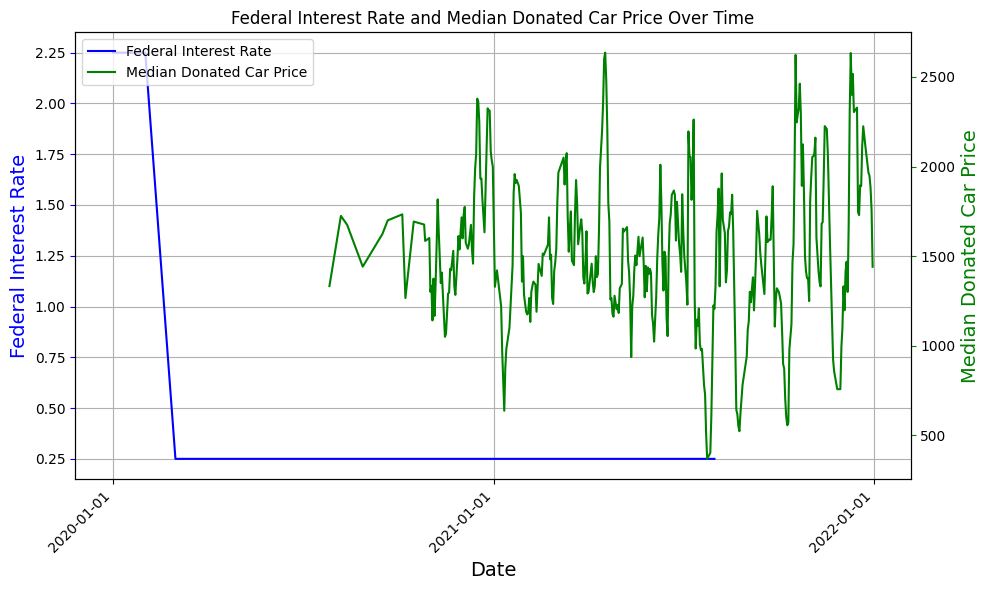

In [39]:
# import the require library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

median_prices_filtered['Donation_date_time'] = pd.to_datetime(median_prices_filtered['Donation_date_time'])

# We are sorting the dataframe by the donation date time column
median_prices_filtered_sorted = median_prices_filtered.sort_values(by='Donation_date_time')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Format plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()

# Adding rolling average

In [77]:
federal_funds_filtered['DATE'],federal_funds_filtered['FEDFUNDS']

NameError: ignored

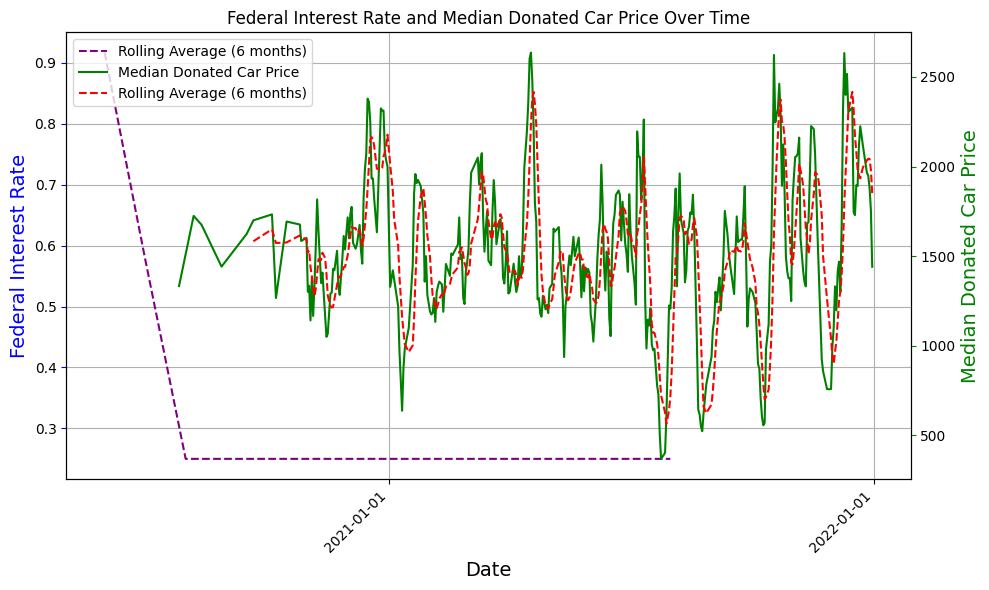

In [73]:
# import the require lbirary
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Converting Donation date time to datetime
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])
# We are Sorting the dataframe by the donation date time column
median_prices_filtered_sorted = median_prices_filtered_sorted.sort_values(by='Donation_date_time')
# We are Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Calculate and plot the rolling average for Federal Interest Rate
rolling_avg_window_federal = 6
rolling_avg_federal = federal_discount_filtered['INTDSRUSM193N'].rolling(window=rolling_avg_window_federal).mean()
ax1.plot(federal_discount_filtered['DATE'], rolling_avg_federal, linestyle='--', color='purple', label=f'Rolling Average ({rolling_avg_window_federal} months)')
# We are Plot Federal Interest Rate on the primary y-axis (left)
#ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'],linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)



# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')

# Calculate and plot the rolling average
rolling_avg_window = 6
rolling_avg = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg, linestyle='--', color='r', label=f'Rolling Average ({rolling_avg_window} months)')

ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Format plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()


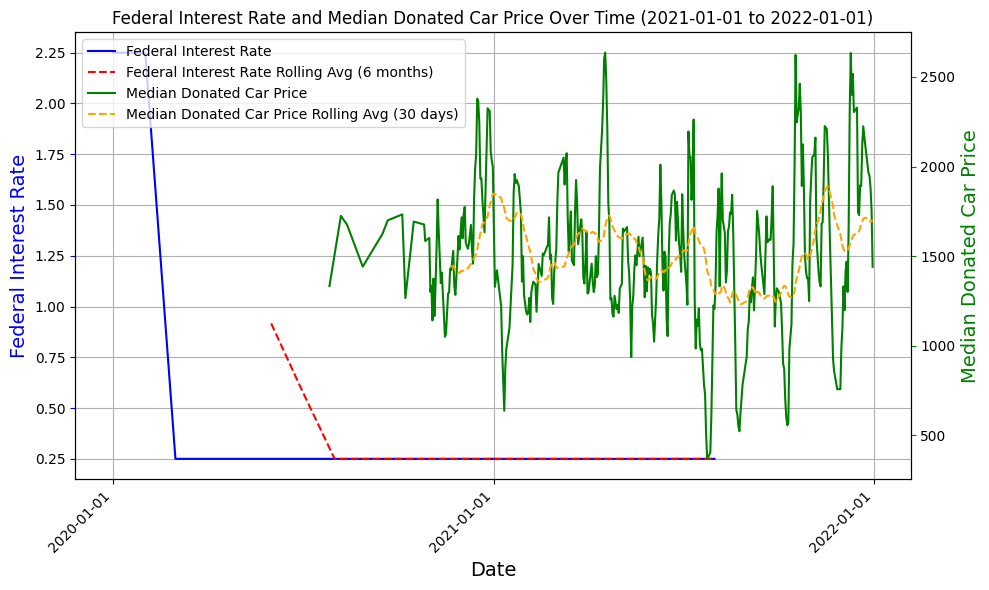

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have a DataFrame with Federal Interest Rate data, replace this with your actual data
# federal_discount_filtered = ... # Your filtered DataFrame

# Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# Customizing date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# Creating a secondary y-axis (right) for Median Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Adding rolling average for Federal Interest Rate
rolling_avg_window_federal = 6
rolling_avg_federal = federal_discount_filtered['INTDSRUSM193N'].rolling(window=rolling_avg_window_federal).mean()
ax1.plot(federal_discount_filtered['DATE'], rolling_avg_federal, linestyle='--', color='r', label=f'Federal Interest Rate Rolling Avg ({rolling_avg_window_federal} months)')

# Adding rolling average for Median Donated Car price
rolling_avg_window_car_price = 30
rolling_avg_car_price = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window_car_price).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg_car_price, linestyle='--', color='orange', label=f'Median Donated Car Price Rolling Avg ({rolling_avg_window_car_price} days)')

# Formatting plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time (2021-01-01 to 2022-01-01)')
# Showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tightening the layout for better spacing
plt.tight_layout()
plt.show()


# after adding rolling average, we need to add whether is upward or downward trend

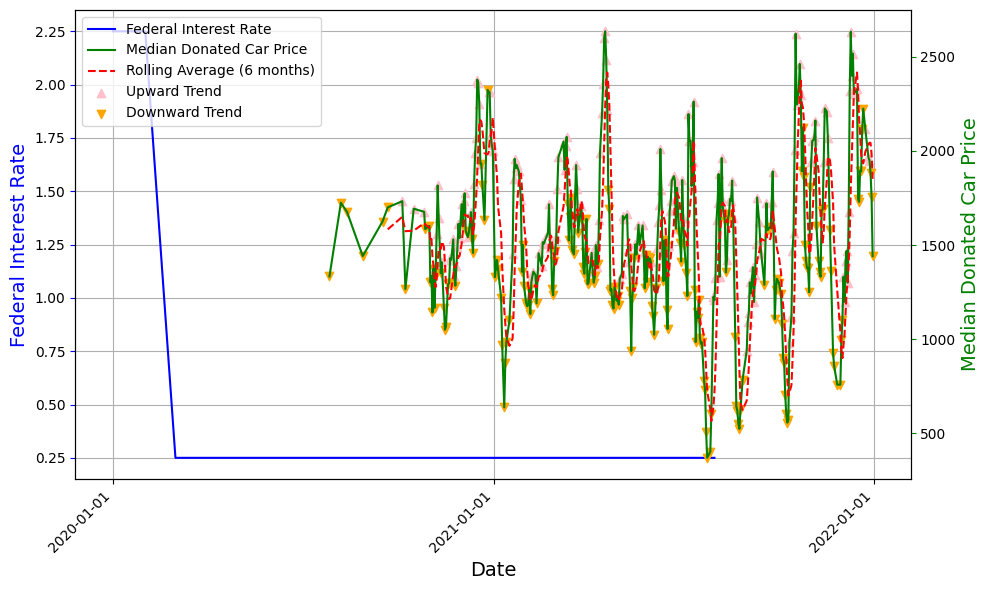

     price_smoothed           trend
8       1333.333333  Downward Trend
9       1725.000000  Downward Trend
10      1675.000000  Downward Trend
11      1441.666667  Downward Trend
12      1625.000000  Downward Trend
..              ...             ...
360     1965.833333    Upward Trend
361     1949.166667    Upward Trend
362     1882.500000  Downward Trend
363     1757.500000  Downward Trend
364     1440.833333  Downward Trend

[357 rows x 2 columns]


In [49]:
# import the require lbirary
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Converting Donation date time to datetime
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])
# We are Sorting the dataframe by the donation date time column
median_prices_filtered_sorted = median_prices_filtered_sorted.sort_values(by='Donation_date_time')
# We are Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# We are Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'],linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)



# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')

# Calculate and plot the rolling average
rolling_avg_window = 6
rolling_avg = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg, linestyle='--', color='r', label=f'Rolling Average ({rolling_avg_window} months)')

ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Detecting trend using the slope of the rolling average
trend_threshold = 0.1

# We are Calculate the dirst derivative of the rolling average
rolling_avg_slope = rolling_avg.diff()

# We are Identify trend based on the slope
trend = ['No Trend' if abs(slope) < trend_threshold else 'Upward Trend' if slope > 0 else 'Downward Trend' for slope in rolling_avg_slope]
median_prices_filtered_sorted['trend'] = trend

# We are Plots markers to indicate trend changes
upward_trend_dates = median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Upward Trend', 'Donation_date_time']
downward_trend_dates = median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Downward Trend', 'Donation_date_time']

ax2.scatter(upward_trend_dates, median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Upward Trend', 'price_smoothed'], marker='^', color='pink', label='Upward Trend')
ax2.scatter(downward_trend_dates, median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Downward Trend', 'price_smoothed'], marker='v', color='orange', label='Downward Trend')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()

# We are Display the DataFrame with trend information
print(median_prices_filtered_sorted[['price_smoothed', 'trend']])



# adding the economical event into the graph

In [50]:
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])

# We are Filter the DataFrame for the specified date
selected_date = '2021-11-15'
selected_date_values = median_prices_filtered_sorted[median_prices_filtered_sorted['Donation_date_time'] == selected_date]

# We are Extract values for the price of car donated on specified date
car_prices_on_selected_date = selected_date_values['price_smoothed'].tolist()
# Print or use the values as needed
print(f"Car prices donated on {selected_date}: {car_prices_on_selected_date}")

Car prices donated on 2021-11-15: [2225.8333333333335]


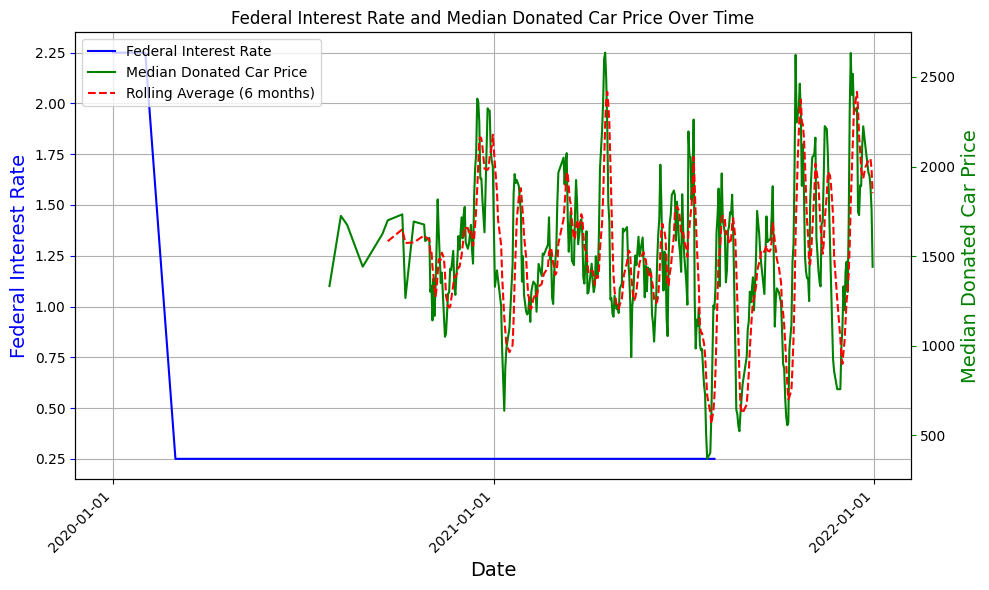

In [51]:
# import the require lbirary
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Converting Donation date time to datetime
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])
# We are Sorting the dataframe by the donation date time column
median_prices_filtered_sorted = median_prices_filtered_sorted.sort_values(by='Donation_date_time')
# We are Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# We are Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'],linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)



# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')

# Calculate and plot the rolling average
rolling_avg_window = 6
rolling_avg = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg, linestyle='--', color='r', label=f'Rolling Average ({rolling_avg_window} months)')

ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Format plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()


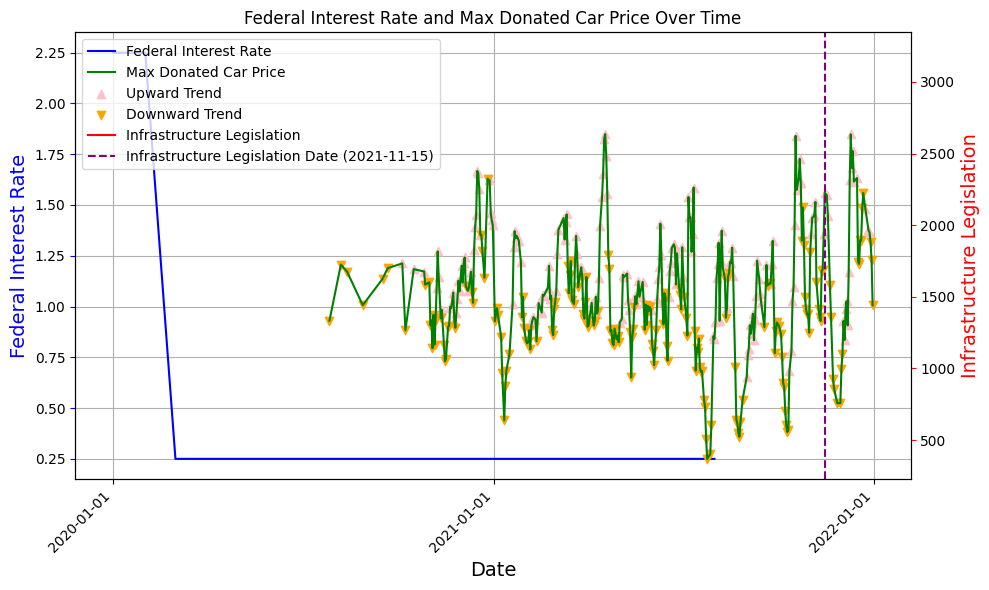

     price_smoothed           trend
8       1333.333333  Downward Trend
9       1725.000000  Downward Trend
10      1675.000000  Downward Trend
11      1441.666667  Downward Trend
12      1625.000000  Downward Trend
..              ...             ...
360     1965.833333    Upward Trend
361     1949.166667    Upward Trend
362     1882.500000  Downward Trend
363     1757.500000  Downward Trend
364     1440.833333  Downward Trend

[357 rows x 2 columns]


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Donation_date_time' is the datetime column in your max_prices_filtered_sorted dataframe
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])

# Filter the DataFrame for the specified date
selected_date = '2021-11-15'
selected_date_values = median_prices_filtered_sorted[median_prices_filtered_sorted['Donation_date_time'] == selected_date]

# Extract the values for the price of cars donated on the specified date
car_prices_on_selected_date = selected_date_values['price_smoothed'].tolist()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)

# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Max Donated Car Price')
ax2.set_ylabel('Max Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Detecting trend using the slope of the rolling average
trend_threshold = 0.1

# We are Calculate the dirst derivative of the rolling average
rolling_avg_slope = rolling_avg.diff()

# We are Identify trend based on the slope
trend = ['No Trend' if abs(slope) < trend_threshold else 'Upward Trend' if slope > 0 else 'Downward Trend' for slope in rolling_avg_slope]
median_prices_filtered_sorted['trend'] = trend

# We are Plots markers to indicate trend changes
upward_trend_dates = median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Upward Trend', 'Donation_date_time']
downward_trend_dates = median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Downward Trend', 'Donation_date_time']

ax2.scatter(upward_trend_dates, median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Upward Trend', 'price_smoothed'], marker='^', color='pink', label='Upward Trend')
ax2.scatter(downward_trend_dates, median_prices_filtered_sorted.loc[median_prices_filtered_sorted['trend'] == 'Downward Trend', 'price_smoothed'], marker='v', color='orange', label='Downward Trend')




# We are adding a vertical line to show the economical event
infrastructure_data = pd.DataFrame({'Date': ['2021-11-15'], 'Value': [3204.1666666666665]})
infrastructure_data['Date'] = pd.to_datetime(infrastructure_data['Date'])

ax2.plot(infrastructure_data['Date'], infrastructure_data['Value'], linestyle='-', color='r', label='Infrastructure Legislation')
ax2.set_ylabel('Infrastructure Legislation', color='r', fontsize=14)
ax2.tick_params('y', color='r')

# we are adding a vertical line for the event date
ax2.axvline(x=pd.to_datetime(selected_date), color='purple', linestyle='--', label=f'Infrastructure Legislation Date ({selected_date})')
# Format plots
plt.title('Federal Interest Rate and Max Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()

# We are Display the DataFrame with trend information
print(median_prices_filtered_sorted[['price_smoothed', 'trend']])

# We wish to observe the newly combined dataset of car donation and federal interest rate

In [53]:
import pandas as pd

In [54]:
FEDFUNDS=pd.read_csv("/content/drive/MyDrive/datas/FEDFUNDS.csv")

In [55]:
FEDFUNDS1=FEDFUNDS[['FEDFUNDS']]

In [56]:
FEDFUNDS1=FEDFUNDS[['FEDFUNDS']]

In [57]:
car_donation.head()

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time,Donation_date_time
0,SF,1.0,11.0,2021.0,1.0,2021-01-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-08-07
1,SF,2.0,11.0,2020.0,11.0,2020-11-01,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-10-31
2,SF,3.0,11.0,2020.0,11.0,2020-11-01,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-10-31
3,SF,4.0,11.0,2020.0,11.0,2020-11-01,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-11-01
4,SF,5.0,11.0,2020.0,11.0,2020-11-01,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-11-01


In [58]:
FEDFUNDS.head()

,DATE,FEDFUNDS
0,2018-01-01,1.41
1,2018-02-01,1.42
2,2018-03-01,1.51
3,2018-04-01,1.69
4,2018-05-01,1.70


In [59]:
FEDFUNDS['DATE'].min()

'2018-01-01'

In [60]:
FEDFUNDS['DATE'].max()

'2023-01-01'

# Next, I want to create an separate timeplot for  the federal fund

ConversionError: ignored

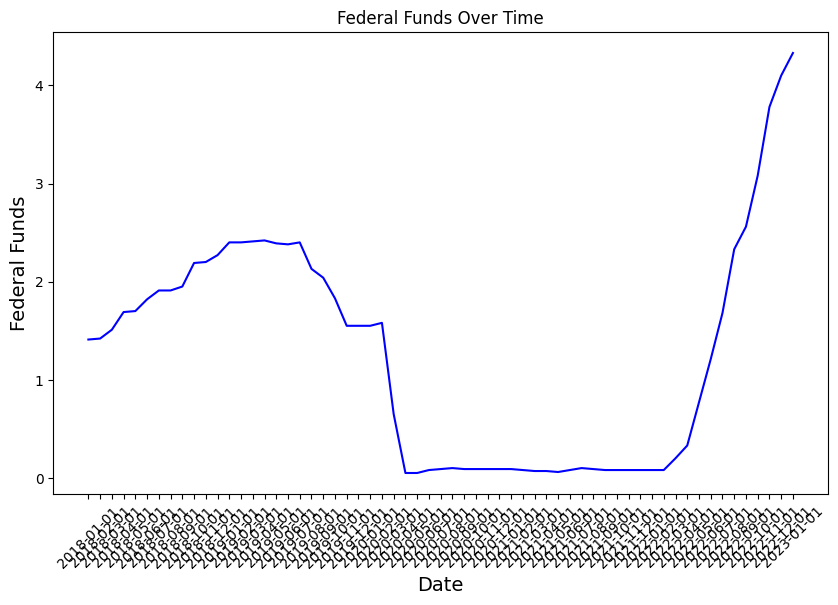

In [61]:
# Import the require library
import matplotlib.dates as mdates
# We are Plotting
plt.figure(figsize=(10, 6))
plt.plot(FEDFUNDS['DATE'],FEDFUNDS['FEDFUNDS'], linestyle='-', color='b')

# Time to Formating the plot
plt.title('Federal Funds Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Federal Funds', fontsize=14)
# Setting up the xticks and xlimits
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2023-01-01'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

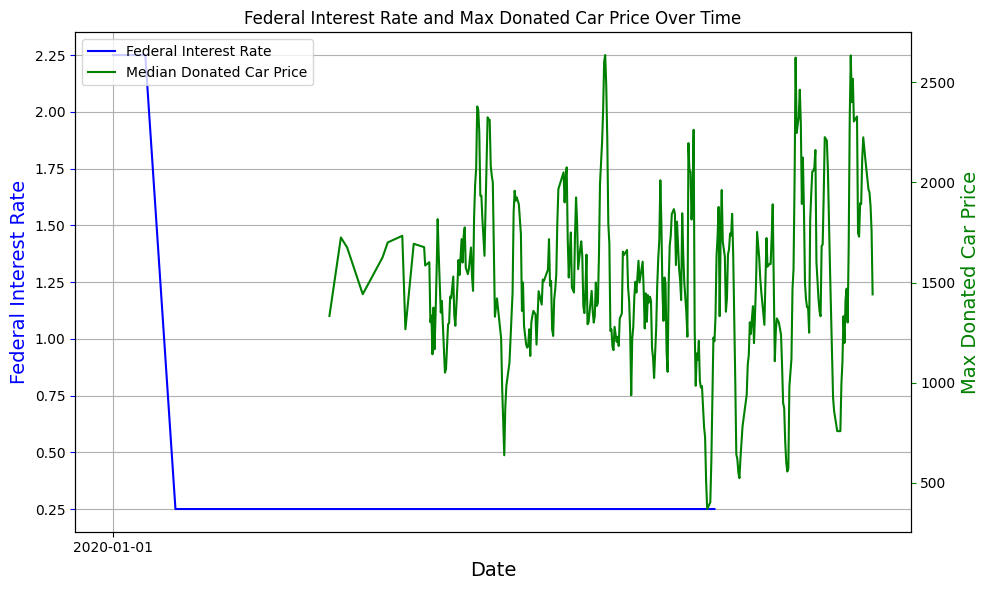

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

federal_discount['DATE'] = pd.to_datetime(federal_discount['DATE'])
median_prices['Donation_date_time'] = pd.to_datetime(median_prices['Donation_date_time'])

# we are Filter data within the specified date range
start_date = '2020-01-01'
end_date = '2021-12-31'
federal_discount_filtered = federal_discount[(federal_discount['DATE'] >= start_date) & (federal_discount['DATE']<= end_date)]
median_prices_filtered = median_prices[(median_prices['Donation_date_time'] >= start_date) & (median_prices['Donation_date_time']<= end_date)]

# create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_discount_filtered['DATE'], federal_discount_filtered['INTDSRUSM193N'], linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.grid(True)

# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered['Donation_date_time'], median_prices_filtered['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')
ax2.set_ylabel('Max Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# We are Formatting plots
plt.title('Federal Interest Rate and Max Donated Car Price Over Time')

# We are showing legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()

# time to combine the two plots together

NameError: ignored

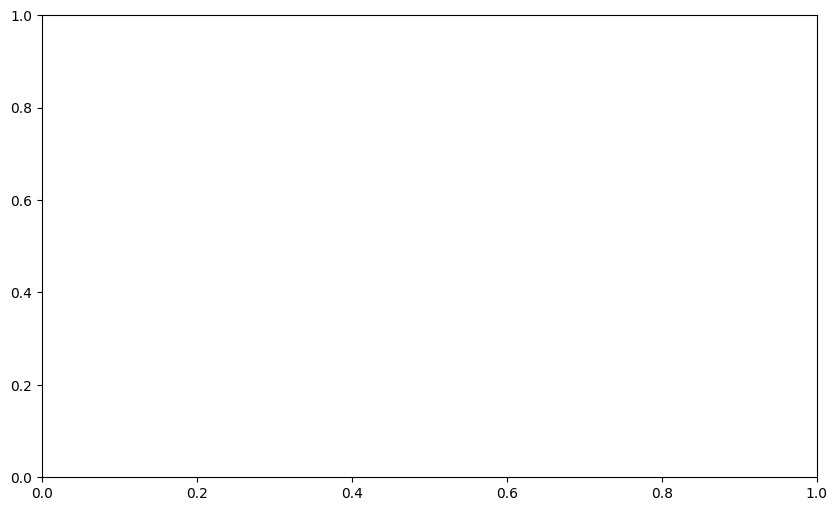

In [80]:
# import the require lbirary
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# We are Converting Donation date time to datetime
median_prices_filtered_sorted['Donation_date_time'] = pd.to_datetime(median_prices_filtered_sorted['Donation_date_time'])
# We are Sorting the dataframe by the donation date time column
median_prices_filtered_sorted = median_prices_filtered_sorted.sort_values(by='Donation_date_time')
# We are Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# We are Plot Federal Interest Rate on the primary y-axis (left)
ax1.plot(federal_funds['DATE'],federal_funds['FEDFUNDS'],linestyle='-', color='b', label='Federal Interest Rate')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Federal Interest Rate', color='b', fontsize=14)
ax1.tick_params('y', color='b')

# We are Customize date labels
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(True)



# Create a secondary y-axis (right) for Max Donated Car Price
ax2 = ax1.twinx()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], median_prices_filtered_sorted['price_smoothed'], linestyle='-', color='g', label='Median Donated Car Price')

# Calculate and plot the rolling average
rolling_avg_window = 6
rolling_avg = median_prices_filtered_sorted['price_smoothed'].rolling(window=rolling_avg_window).mean()
ax2.plot(median_prices_filtered_sorted['Donation_date_time'], rolling_avg, linestyle='--', color='r', label=f'Rolling Average ({rolling_avg_window} months)')

ax2.set_ylabel('Median Donated Car Price', color='g', fontsize=14)
ax2.tick_params('y', color='g')

# Format plots
plt.title('Federal Interest Rate and Median Donated Car Price Over Time')

# Show legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout for better spacing
plt.tight_layout()
plt.show()



# Next, we also wish to check the Car's price trend

In [64]:
car_price_trend=pd.read_csv("/content/drive/MyDrive/datas/Carsprice-trends2 - Sheet1 (1).csv")

In [65]:
car_donation.head()

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time,Donation_date_time
0,SF,1.0,11.0,2021.0,1.0,2021-01-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-08-07
1,SF,2.0,11.0,2020.0,11.0,2020-11-01,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-10-31
2,SF,3.0,11.0,2020.0,11.0,2020-11-01,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-10-31
3,SF,4.0,11.0,2020.0,11.0,2020-11-01,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-11-01
4,SF,5.0,11.0,2020.0,11.0,2020-11-01,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56,2020-11-01


In [66]:
car_donation.columns

Index(['operation', 'id', 'status', 'Sold_Year', 'Sold_month',
       'Sold_Yearmonth', 'Donation_date', 'time', 'name', 'car_year', 'make',
       'model', 'mileage', 'plate', 'vin', 'phone', 'address', 'addr', 'email',
       'infofrom', 'remarks', 'whopickup', 'cleanorsalvage',
       'carfaxinfoowners', 'registrationfee', 'cost', 'workhours', 'whorepair',
       'fixrecord', 'onlinedate', 'firstprice', 'dateofsale', 'price',
       'Direct cost', 'cost type', 'Cost subtype', 'buyer', 'addrofbuyer',
       'whosale', 'who1098', 'leavemessage', 'todolist', 'whotodo',
       'salemileage', 'postdateofbill', 'donorinfo', 'complain', 'ticketNo',
       'ticketdeadline', 'ticketSender', 'ticketAddress', 'stockworklog',
       'areacode', 'isreferral', 'referrer', 'referralfee', 'buyerphone',
       'buyerID', 'buyerEmail', 'plateNew', 'inventoryDate', 'categoryColor',
       'mechanicalIssues', 'retailWholesaleJunk', 'newPlateFromDealer',
       'vinAudit', 'kbb', 'dmvMarketValue', 'useT

In [67]:
car_price_trend.head()

,Make,Avg Price,Last 30 Days,Last 90 Days,YoY
0,CarGurus Index,"28,470.00",0.68%,-2.30%,-7.05%
1,NaN,NaN,NaN,NaN,NaN
2,Convertible,"52,258.00",-0.96%,-2.33%,5.90%
3,Sedan,"21,092.00",-0.27%,-3.76%,-7.56%
4,Hatchback,"17,151.00",-0.41%,-3.21%,-4.06%


In [68]:
# import the require library
import pandas as pd

# assuming make is a common column in both datasets, before anything need to make them into lower cases
car_donation['make_lower'] = car_donation['make'].str.lower()
car_price_trend['make_lower'] = car_price_trend['Make'].str.lower()
merged_df = pd.merge(car_donation,car_price_trend, left_on='make_lower', right_on='make_lower', how='inner')


# We are Displaying the merged dataset
print(merged_df)

    operation      id  status  Sold_Year  Sold_month Sold_Yearmonth  \
0          SF     2.0    11.0     2020.0        11.0     2020-11-01   
1          SF     4.0    11.0     2020.0        11.0     2020-11-01   
2          SF     6.0    11.0     2020.0        11.0     2020-11-01   
3          SF    53.0    11.0     2020.0        12.0     2020-12-01   
4          SF   101.0    11.0     2021.0         1.0     2021-01-01   
..        ...     ...     ...        ...         ...            ...   
939       ETC   501.0     1.0        NaN         NaN            NaT   
940       ETC   501.0     1.0        NaN         NaN            NaT   
941        SF  1123.0     1.0        NaN         NaN            NaT   
942        LA    42.0     1.0        NaN         NaN            NaT   
943       ETC   469.0    10.0     2021.0        10.0     2021-10-01   

    Donation_date                                               time  \
0      2020/10/31                                            4:00 PM   
1  

In [69]:
merged_df.dtypes

operation        object
id              float64
status          float64
Sold_Year       float64
Sold_month      float64
                 ...   
Make             object
Avg Price        object
Last 30 Days     object
Last 90 Days     object
YoY              object
Length: 79, dtype: object

# next, we wish to use some graphical represnetation to compare the car's trend

<ipython-input-70-c009438898a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filter['Avg Price'] = pd.to_numeric(merged_df_filter['Avg Price'].str.replace(',',''), errors='coerce')


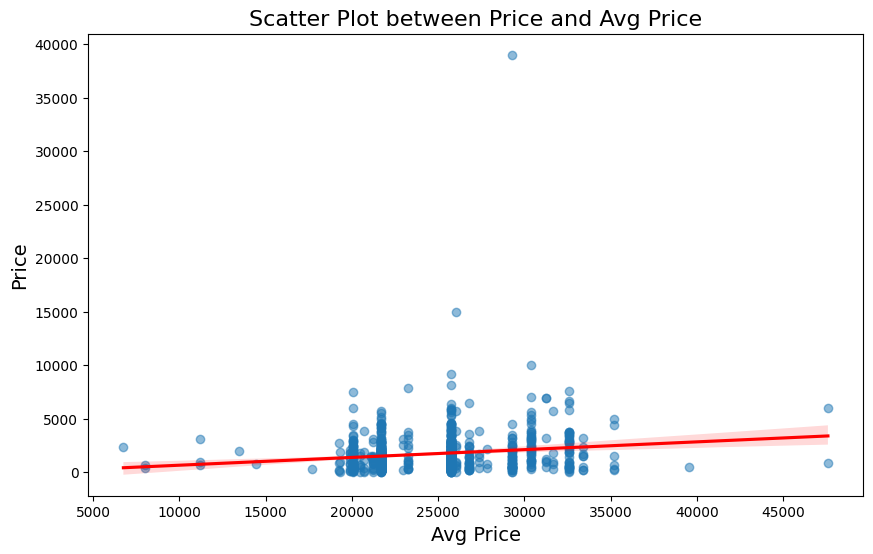

In [70]:
# import the require library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We need to filter out rows where both price and Avg Price  are not NaN
merged_df_filter = merged_df.dropna(subset=['price', 'Avg Price'])
# We need to conver the avg price  to numeric remove commas
merged_df_filter['Avg Price'] = pd.to_numeric(merged_df_filter['Avg Price'].str.replace(',',''), errors='coerce')

# We are Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg Price', y='price', data =merged_df_filter,scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, label='Trend Line')


# We are Adding labels and title
plt.xlabel('Avg Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Scatter Plot between Price and Avg Price', fontsize=16)

# We are Showing the plot
plt.show()

# there is an positive trend, the average price of car's trend does influence the price of donated cars